### Import all mondules that will be used

In [1]:
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def tab(frame, format):
    return tabulate(frame, headers='keys', tablefmt=format)

In [3]:
# Making the csv file readable
df = pd.read_csv('Retail.OrderHistory.1.csv')

In [4]:
#Filling missing calues with 0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         1010 non-null   object 
 1   Order ID                        1010 non-null   object 
 2   Order Date                      1010 non-null   object 
 3   Purchase Order Number           1010 non-null   object 
 4   Currency                        1010 non-null   object 
 5   Unit Price                      1010 non-null   float64
 6   Unit Price Tax                  1010 non-null   float64
 7   Shipping Charge                 1010 non-null   float64
 8   Total Discounts                 1010 non-null   object 
 9   Total Owed                      1010 non-null   float64
 10  Shipment Item Subtotal          1010 non-null   object 
 11  Shipment Item Subtotal Tax      1010 non-null   object 
 12  ASIN                            10

In [5]:
#Filling missing calues with 0
df = df.fillna(0)

In [6]:
# Removing non-numeric characters and converting them to floats
df["Shipment Item Subtotal"] = pd.to_numeric(df["Shipment Item Subtotal"].str.replace('[^\d.]', '', regex=True), errors='coerce')

In [7]:
# getting all the addresses used by using the unique method so there are no repeats
addresses = df["Shipping Address"].unique()
addresses

array(['Imir Ransom 1141 Creekside Dr Wilmington DE 19804 United States',
       'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Teri Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Niyah Ransom 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Amazon Locker - Ingmar 201 W Market St at 7-Eleven Newport DE 19804-3151 United States',
       'Stephanie Pullins 1700 W TIOGA ST APT 606 PHILADELPHIA PA 19140-4936 United States',
       'Niyah Ransom 1700 W TIOGA ST  606 PHILADELPHIA PA 19140-4936 United States',
       'Jaliah Ransom 140 W 22ND ST CHESTER PA 19013-5017 United States',
       'Ahmad Benefield 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Teyonna Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States',
       'Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 19804-3931 United States',
       'Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-4401 United States'

In [8]:
steph1 = addresses[1]
steph2 = addresses[6] 
steph1

'Stephanie Pullins 3007 N STILLMAN ST PHILADELPHIA PA 19132-1306 United States'

In [9]:
steph2

'Niyah Ransom 1700 W TIOGA ST  606 PHILADELPHIA PA 19140-4936 United States'

In [10]:
s = df.groupby(['Shipping Address'])['Shipment Item Subtotal'].sum().reset_index()
s

,Shipping Address,Shipment Item Subtotal
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,65.64
1,Amazon Locker - Ingmar 201 W Market St at 7-El...,0.00
2,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
3,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,1064.44
4,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,1268.42
5,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,3457.97
6,Imir Ransom 2 Indepence Hall Newark Delaware 1...,26.80
7,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,214.74
8,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,396.13
9,Jaliah Ransom 140 W 22ND ST CHESTER PA 19013-5...,44.91


In [11]:
s = df.groupby(['Shipping Address'])['Total Owed'].sum().reset_index()
s

,Shipping Address,Total Owed
0,Ahmad Benefield 3007 N STILLMAN ST PHILADELPHI...,65.98
1,Amazon Locker - Ingmar 201 W Market St at 7-El...,0.00
2,Imir 1140 CREEKSIDE DR APT 1 WILMINGTON DE 198...,145.48
3,Imir 2005 CERVANTES CT NEWARK DE 19702-4401 Un...,646.81
4,Imir 33 WENARK DR APT 12 NEWARK DE 19713-1442 ...,1142.67
5,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,3333.44
6,Imir Ransom 2 Indepence Hall Newark Delaware 1...,50.57
7,Imir Ransom 2005 CERVANTES CT NEWARK DE 19702-...,221.71
8,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,381.13
9,Jaliah Ransom 140 W 22ND ST CHESTER PA 19013-5...,47.61


Need to make a column with the addresses reflecting the names of those associated with them

In [12]:
import re
def get_name(name):
    if re.search(r'Stephanie Pullins', name):
        return "Stephanie"
    elif re.search(r'Teri Pullins', name):
        return 'Stephanie Pullins'
    elif re.search(r'Amazon Locker', name):
        return 'Stephanie'
    elif re.search(r'Jaliah Ransom', name):
        return 'Imir'
    elif re.search(r'Niyah Ransom', name):
        return 'Niyah'
    elif re.search(r'Ahmad Benefield', name):
        return "Ahmad"
    elif re.search(r'Teyonna Pullins', name):
        return "Teyonna"
    elif re.search(r'Sadie Graham', name):
        return "Imir"
    elif re.search(r'Jeffrey Mullen', name):
        return "Imir"
    elif re.search('Imir', name):
        return "Imir"

In [13]:
# Applying this function to the age column using the apply() method and assigning the result to a new coumn called name
df['Name'] = df['Shipping Address'].apply(get_name)
# New info for the new column added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         1010 non-null   object 
 1   Order ID                        1010 non-null   object 
 2   Order Date                      1010 non-null   object 
 3   Purchase Order Number           1010 non-null   object 
 4   Currency                        1010 non-null   object 
 5   Unit Price                      1010 non-null   float64
 6   Unit Price Tax                  1010 non-null   float64
 7   Shipping Charge                 1010 non-null   float64
 8   Total Discounts                 1010 non-null   object 
 9   Total Owed                      1010 non-null   float64
 10  Shipment Item Subtotal          987 non-null    float64
 11  Shipment Item Subtotal Tax      1010 non-null   object 
 12  ASIN                            10

In [14]:
# Getting the unique names from the DataFrame
df['Name'].unique()

array(['Imir', 'Stephanie', 'Stephanie Pullins', 'Niyah', 'Ahmad',
       'Teyonna'], dtype=object)

## Who spent the most money?
### DataFrame
After getting the `Name` of those that made purchases on the account using the `Shipping Address` column,
I find the sum of the `Total Owed` (the total amount of purchases they made) and group them together
to see who made the most purchases since the beginning of the account

In [15]:
#df.sort_values('Name')

In [16]:
overall_sum = df.groupby(['Name'])['Total Owed'].sum().reset_index()
overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,6183.03
2,Niyah,711.76
3,Stephanie,11181.53
4,Stephanie Pullins,46.38
5,Teyonna,23.05


## Who spent the most money
### Plotted
The y axis is the total amount spent. I used my variable `overall_sum` to represent the total amont spent so that it was the same
size as my x axis. I also made the x axis the same size using the method `unique` since the sum of from the `Total Owed` only gives the
unique column names since they were grouped together in using the measurement `sum`. <break>
    
Though, the next issue I had was `df['Name'].unique()` was putting the names in the incorrect order, for the `overall_sum` DataFrame has
the names in alphabetical order. So, I casted the `sorted` function over it so that `Name` column would return in alphabetical order,
matching it up with it's respective data.

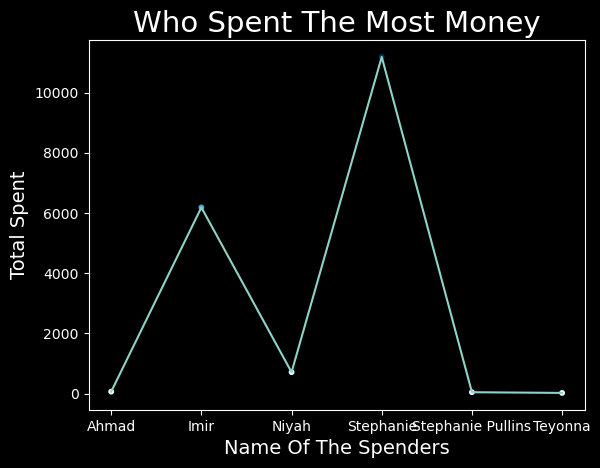

In [17]:
x = sorted(df['Name'].unique())
y = overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('who spent the most money'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title(), fontsize=14)


plt.plot(x, y)
plt.show()

In [18]:
def get_month_2023(date):
    if re.search(r'^(\d{4})-01-', date):
        return 'January'
    elif re.search(r'^(\d{4})-02-', date):
        return 'February'
    elif re.search(r'^(\d{4})-03-', date):
        return 'March'
    elif re.search(r'^(\d{4})-04-', date):
        return 'April'
    elif re.search(r'^(\d{4})-05-', date):
        return 'May'
    elif re.search(r'^(\d{4})-06-', date):
        return 'June'
    elif re.search(r'^(\d{4})-07-', date):
        return 'July'
    elif re.search(r'^(\d{4})-08-', date):
        return 'August'
    elif re.search(r'^(\d{4})-09-', date):
        return 'September'
    elif re.search(r'^(\d{4})-10-', date):
        return 'October'
    elif re.search(r'^(\d{4})-11-', date):
        return 'November'
    elif re.search(r'^(\d{4})-12-', date):
        return 'December'

    

In [19]:
df['Month'] = df['Order Date'].apply(get_month_2023)

### The amount of orders for each month in 2023

In [20]:
dates_and_months = df.groupby(['Month'])['Order Date'].size().reset_index()
dates_and_months

,Month,Order Date
0,April,74
1,August,100
2,December,48
3,February,126
4,January,104
5,July,69
6,June,92
7,March,34
8,May,77
9,November,85


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         1010 non-null   object 
 1   Order ID                        1010 non-null   object 
 2   Order Date                      1010 non-null   object 
 3   Purchase Order Number           1010 non-null   object 
 4   Currency                        1010 non-null   object 
 5   Unit Price                      1010 non-null   float64
 6   Unit Price Tax                  1010 non-null   float64
 7   Shipping Charge                 1010 non-null   float64
 8   Total Discounts                 1010 non-null   object 
 9   Total Owed                      1010 non-null   float64
 10  Shipment Item Subtotal          987 non-null    float64
 11  Shipment Item Subtotal Tax      1010 non-null   object 
 12  ASIN                            10

### The amount of orders for each month in 2023 by each person

In [22]:
# Using the measurement size to get the amount of orders for the month of each person
dates_and_months = df.groupby(['Month', 'Name'])['Order Date'].size().reset_index()
dates_and_months

,Month,Name,Order Date
0,April,Imir,15
1,April,Stephanie,59
2,August,Imir,15
3,August,Stephanie,85
4,December,Imir,13
5,December,Stephanie,34
6,December,Stephanie Pullins,1
7,February,Ahmad,1
8,February,Imir,8
9,February,Stephanie,117


In [23]:
pivoted_df = dates_and_months.pivot(
    columns='Name',
    index='Month',
    values='Order Date'
)
pivoted_df = pivoted_df.fillna(0)
pivoted_df

Name,Ahmad,Imir,Niyah,Stephanie,Stephanie Pullins,Teyonna
Month,,,,,,
April,0.0,15.0,0.0,59.0,0.0,0.0
August,0.0,15.0,0.0,85.0,0.0,0.0
December,0.0,13.0,0.0,34.0,1.0,0.0
February,1.0,8.0,0.0,117.0,0.0,0.0
January,0.0,9.0,0.0,95.0,0.0,0.0
July,0.0,15.0,0.0,54.0,0.0,0.0
June,1.0,24.0,0.0,67.0,0.0,0.0
March,0.0,5.0,0.0,29.0,0.0,0.0
May,0.0,19.0,0.0,54.0,0.0,4.0


In [24]:
items_for_2023 = df[df["Order Date"] >= "2023-01-01"]
items_for_2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 0 to 778
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Website                         779 non-null    object 
 1   Order ID                        779 non-null    object 
 2   Order Date                      779 non-null    object 
 3   Purchase Order Number           779 non-null    object 
 4   Currency                        779 non-null    object 
 5   Unit Price                      779 non-null    float64
 6   Unit Price Tax                  779 non-null    float64
 7   Shipping Charge                 779 non-null    float64
 8   Total Discounts                 779 non-null    object 
 9   Total Owed                      779 non-null    float64
 10  Shipment Item Subtotal          765 non-null    float64
 11  Shipment Item Subtotal Tax      779 non-null    object 
 12  ASIN                            779 non-n

In [25]:
current_overall_sum = items_for_2023.groupby(['Name'])['Total Owed'].sum().reset_index()
current_overall_sum

,Name,Total Owed
0,Ahmad,65.98
1,Imir,2725.08
2,Niyah,711.76
3,Stephanie,9285.00
4,Stephanie Pullins,46.38
5,Teyonna,23.05


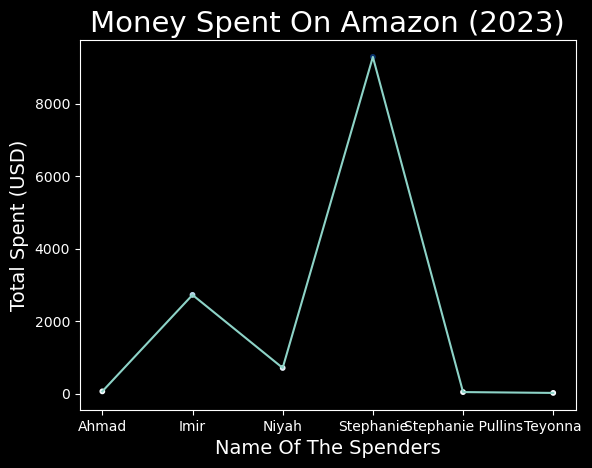

In [26]:
x = sorted(items_for_2023['Name'].unique())
y = current_overall_sum['Total Owed']
plt.style.use('dark_background')
fig, ax = plt.subplots()
ax.scatter(x, y, c=y, cmap=plt.cm.Blues, s=10)
ax.set_title('money spent on amazon (2023)'.title(), fontsize=21)
ax.set_xlabel("name of the spenders".title(), fontsize=14)
ax.set_ylabel('total spent'.title() + ' (USD)', fontsize=14)
plt.plot(x, y)
plt.show()

In [27]:
name_index = df.set_index('Name')

In [28]:
df1 = name_index.drop(['Niyah', 'Teyonna', 'Ahmad']).reset_index()

In [29]:
df1 = pd.DataFrame(df1)

In [30]:
df1

,Name,Website,Order ID,Order Date,Purchase Order Number,Currency,Unit Price,Unit Price Tax,Shipping Charge,Total Discounts,...,Ship Date,Shipping Option,Shipping Address,Billing Address,Carrier Name & Tracking Number,Product Name,Gift Message,Gift Sender Name,Gift Recipient Contact Details,Month
0,Imir,Amazon.com,112-9635934-6416260,2023-12-07T02:16:59Z,Not Applicable,USD,39.99,0.00,0.00,0,...,2023-12-08T10:04:30Z,next-1dc,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,Imir Ransom 1141 Creekside Dr Wilmington DE 19...,AMZN_US(TBA310322605316),Macally Multi Device Backlit Mac Bluetooth Key...,Not Available,Not Available,Not Available,December
1,Stephanie,Amazon.com,112-4148362-2721041,2023-12-06T07:31:30Z,Not Applicable,USD,25.99,1.56,0.00,0,...,2023-12-06T17:28:11Z,next-1dc,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,USPS(9361289681026025179193),HIPPIE CRAFTER Watercolor Colored Pencils for ...,Not Available,Not Available,Not Available,December
2,Stephanie,Amazon.com,112-6935582-0369853,2023-12-04T00:13:04Z,Not Applicable,USD,9.29,0.56,0.00,0,...,2023-12-08T07:32:43Z,std-n-us,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Not Available,Colorya 72 Soft Core Premium Colored Pencils W...,Not Available,Not Available,Not Available,December
3,Stephanie,Amazon.com,112-2092965-5882602,2023-12-04T00:13:04Z,Not Applicable,USD,5.24,0.31,0.00,0,...,2023-12-04T23:17:30Z,second-nominated-day,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,UPS(1ZAC27650205605441),MARKART Professional Drawing Sketching Pencil ...,Not Available,Not Available,Not Available,December
4,Stephanie,Amazon.com,112-2092965-5882602,2023-12-04T00:13:04Z,Not Applicable,USD,7.99,0.48,0.00,0,...,2023-12-05T16:20:06Z,second-nominated-day,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,Stephanie Pullins 3007 N STILLMAN ST PHILADELP...,AMZN_US(TBA310242061487),"iBayam 9"" x 12"" Premium Sketch Book Set, 1-Pac...",Not Available,Not Available,Not Available,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,Imir,Amazon.com,113-1020157-3732228,2019-03-13T03:49:46Z,Not Applicable,USD,21.99,0.00,0.00,0,...,2019-03-13T15:28:17Z,second,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,AMZN_US(TBA914851299000),Mpow Flame Bluetooth Headphones Waterproof IPX...,Not Available,Not Available,Not Available,March
961,Imir,Amazon.com,111-3837808-3532240,2018-12-07T17:58:13Z,Not Applicable,USD,45.79,0.00,0.00,0,...,2018-12-08T01:15:56Z,Std US D2D Dom,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,Imir Ransom 83 PIKE CREEK RD APT 1B NEWARK DE ...,China Post(LT090332896CN),"Tulas Action Figure Drawing Models, 2 Pcs Huma...",Not Available,Not Available,Not Available,December
962,Imir,Amazon.com,106-7683127-1053051,2016-07-23T12:00:46Z,Not Applicable,USD,7.50,0.00,12.53,0,...,2016-07-25T22:43:41Z,Exp Cont US Street Addr,Imir Ransom 2 Indepence Hall Newark Delaware 1...,Imir Ransom 2 Indepence Hall Newark Delaware 1...,USPS(9400110200883141471846),Dragonball Evolution Movie 4 Inch Action Figur...,Not Available,Not Available,Not Available,July
963,Imir,Amazon.com,106-0231178-3420224,2016-07-23T12:00:46Z,Not Applicable,USD,12.90,0.00,11.24,0,...,2016-07-24T08:19:33Z,second,Imir Ransom 2 Indepence Hall Newark Delaware 1...,Imir Ransom 2 Indepence Hall Newark Delaware 1...,AMZN_US(TBA042166591000),Dragonball Evolution Movie 4 Inch Action Figur...,Not Available,Not Available,Not Available,July


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            965 non-null    object 
 1   Website                         965 non-null    object 
 2   Order ID                        965 non-null    object 
 3   Order Date                      965 non-null    object 
 4   Purchase Order Number           965 non-null    object 
 5   Currency                        965 non-null    object 
 6   Unit Price                      965 non-null    float64
 7   Unit Price Tax                  965 non-null    float64
 8   Shipping Charge                 965 non-null    float64
 9   Total Discounts                 965 non-null    object 
 10  Total Owed                      965 non-null    float64
 11  Shipment Item Subtotal          943 non-null    float64
 12  Shipment Item Subtotal Tax      965 

In [32]:
df.to_csv('/Users/imir/python/amazon_orders.csv')

In [ ]:
df1.to_csv('/Users/imir/python/orders_amazon.csv')

In [33]:
new_df = pd.read_csv('/Users/imir/python/amazon_orders.csv')

In [35]:
new_df['Name'].unique()

array(['Imir', 'Stephanie', 'Stephanie Pullins', 'Niyah', 'Ahmad',
       'Teyonna'], dtype=object)

In [ ]:
new_df.drop(columns=['Name'])